In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

In [26]:
dataTrain=pd.read_csv("allAtt_onehot_large_train_new8.csv")
dataTest=pd.read_csv("allAtt_onehot_large_test_new8.csv")
print(dataTrain.head(10))
print(dataTrain.shape)

         Date     HomeTeam    AwayTeam  FTR   VCH  B365H  HTGS  ATGS  HTGC  \
0  2010-08-14  Aston Villa    West Ham    0  2.00   2.00   0.0   0.0   0.0   
1  2010-08-14    Blackburn     Everton    0  3.10   2.88   0.0   0.0   0.0   
2  2010-08-14       Bolton      Fulham    1  2.20   2.20   0.0   0.0   0.0   
3  2010-08-14      Chelsea   West Brom    0  1.17   1.17   0.0   0.0   0.0   
4  2010-08-14   Sunderland  Birmingham    1  2.20   2.10   0.0   0.0   0.0   
5  2010-08-14    Tottenham    Man City    1  2.30   2.40   0.0   0.0   0.0   
6  2010-08-14        Wigan   Blackpool    1  1.83   1.83   0.0   0.0   0.0   
7  2010-08-14       Wolves       Stoke    0  2.30   2.30   0.0   0.0   0.0   
8  2010-08-15    Liverpool     Arsenal    1  2.50   2.50   0.0   0.0   0.0   
9  2010-08-16   Man United   Newcastle    0  1.22   1.25   0.0   0.0   0.0   

   ATGC  ...  DiffPts  DiffFormPts  DiffLP  H2HM1  H2HM2  H2HM3  H2HM4  H2HM5  \
0   0.0  ...      0.0          0.0   -11.0     -1     -1    

In [27]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 1).
# Each input sequence will be of size (28, 1).
input_dim = 34

units = 64
output_size = 2  # labels are from Win or Loss

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(input_dim,1))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(input_dim,1)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size, activation="softmax"),
        ]
    )
    return model

In [28]:
x_train, y_train = dataTrain.iloc[:,4:38].values,dataTrain.iloc[:,38:].values
x_train=np.reshape(x_train,(4940,34,1))
x_test, y_test = dataTest.iloc[:,4:38].values,dataTest.iloc[:,38:].values
x_test=np.reshape(x_test,(380,34,1))

In [29]:
y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [30]:


import tensorflow.keras.backend as K

model = build_model(allow_cudnn_kernel=True)

# def focal_loss(gamma=2., alpha=[0.25, 0.25, 0.5]):
#     def focal_loss_fixed(y_true, y_pred):
#         y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
#         loss = -y_true * K.log(y_pred) * K.pow(1 - y_pred, gamma)
#         alpha_factor = tf.convert_to_tensor(alpha, dtype=tf.float32)
#         loss *= alpha_factor
#         return K.sum(loss, axis=1)
#     return focal_loss_fixed

model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer="Adam",
    metrics=["categorical_accuracy"]
)

model.summary()

E:\python-learn\pythonProject2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,282 (67.51 KB)

 Trainable params: 17,154 (67.01 KB)

 Non-trainable params: 128 (512.00 B)

In [31]:

model.fit(
    x_train, y_train,
    validation_split=0.1,  # 可选，用于验证集
    epochs=20,
    batch_size=batch_size,
    # callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - categorical_accuracy: 0.6329 - loss: 0.6551 - val_categorical_accuracy: 0.5162 - val_loss: 0.6912
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.6400 - loss: 0.6332 - val_categorical_accuracy: 0.5688 - val_loss: 0.6827
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6495 - loss: 0.6316 - val_categorical_accuracy: 0.5607 - val_loss: 0.6814
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.6453 - loss: 0.6289 - val_categorical_accuracy: 0.5870 - val_loss: 0.6839
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6460 - loss: 0.6345 - val_categorical_accuracy: 0.6053 - val_loss: 0.6742
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6504 - loss: 0.6206 - val_categorical_accuracy: 0.5870 - val_loss: 0.6614
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.6528 - loss: 0.62

In [33]:
model.save('models/lstm_model.keras')  # ✅ 推荐：使用 .keras 后缀


In [23]:
model1 = keras.models.load_model('lstm_model.keras')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test Accuracy: 65.79%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.66       175
           1       0.72      0.60      0.65       205

    accuracy                           0.66       380
   macro avg       0.66      0.66      0.66       380
weighted avg       0.67      0.66      0.66       380


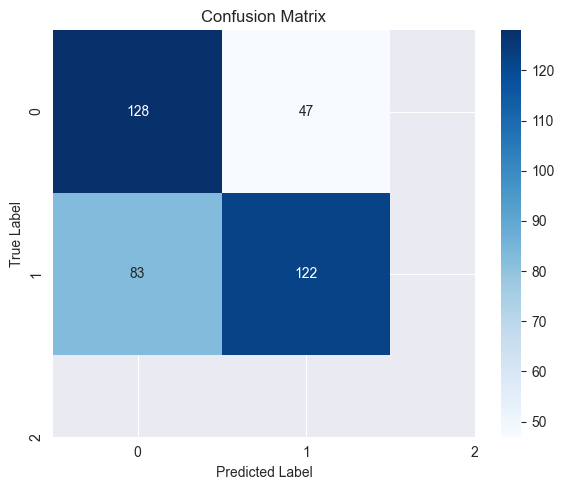

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 预测结果（如果是 one-hot 编码，取 argmax）
y_pred_probs = model1.predict(x_test)
if y_pred_probs.shape[1] > 1:
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
else:
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
    y_true = y_test.flatten()

# 1. Test Accuracy
acc = accuracy_score(y_true, y_pred)
print("Test Accuracy: {:.2f}%".format(acc * 100))

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# 3. 混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 4. 可视化混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Accuracy: 59.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66       175
           1       0.76      0.36      0.49       205

    accuracy                           0.59       380
   macro avg       0.65      0.61      0.57       380
weighted avg       0.65      0.59      0.57       380


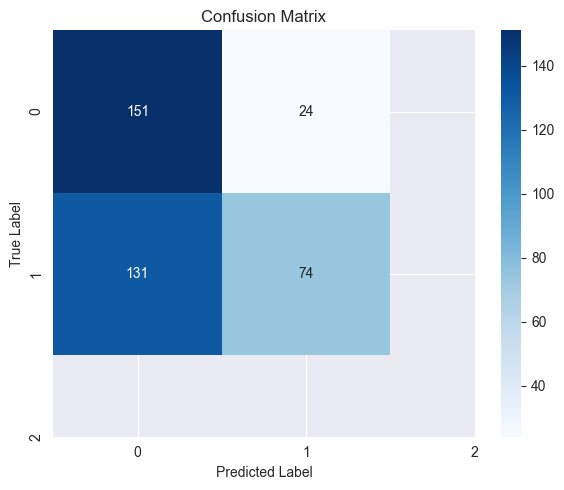

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 预测结果（如果是 one-hot 编码，取 argmax）
y_pred_probs = model.predict(x_test)
if y_pred_probs.shape[1] > 1:
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
else:
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
    y_true = y_test.flatten()

# 1. Test Accuracy
acc = accuracy_score(y_true, y_pred)
print("Test Accuracy: {:.2f}%".format(acc * 100))

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# 3. 混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 4. 可视化混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()